download this file: https://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt

strip the header and footer, convert it to hdf5, renamed to "mamajek-spectral-class.hdf5"
Save into `/Data` directory.

This table can be used to classify the spectral class of the stars.

# Withouth metallicity cut

In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir
# import utils
root_dir = abspath(join(pardir, pardir))
if root_dir not in sys.path:
    sys.path.append(root_dir)
from utils import style, load_spectral_types, safe_mkdir
style("seaborn-bright", tex=True)

In [2]:
# root data directory path
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [3]:
name = "tes"
data_dir = join(root_data_dir, "Color")
safe_mkdir(data_dir)
data_dir = join(root_data_dir, "Color", name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Color already exist. Good to go!
Creating /home2/s20321005/Thesis-Project/Data/Color/tes dir in Data dir


In [4]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Neighbour")
files = glob(join(gaia_dir, "*.hdf5"))
files[:5]

['/home2/s20321005/Thesis-Project/Data/Neighbour/gaia-neighbour.hdf5']

In [5]:
# load best pars data
df = vaex.open(files[0])
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.010526307611580561,-1.5069479765134466,11.213000297546387,10.416000366210938,AAA,4616283493156832640,64.95027923583984,-64.84678804028577,0.01238507591187954,3.665080655375059,0.01239001378417015,11.816099401085904,0.010756381787359715,13.398380279541016,14.354398727416992,12.430805206298828,817.9747314453125,2392.0107421875,1.0612295866012573,1.3268741369247437,2.1613254142300296,-0.5358186393427844,84.85199737548828,84.69239807128906,85.30039978027344,0.3553999960422516,0.3497999906539917,0.36230000853538513,nan,nan,nan,M,00022474-8620303,1,222,--,32.41990661621094,gaia,1.0216929912567139,1.0216929912567139,1.0,3918.379638671875,gspphot,5.97119140625,8.631103515625,0.0,4.763700008392334,gspphot,0.004499912261962891,0.010499954223632812,0.0,nan,--,nan,nan,nan,-0.4165000021457672,gspphot,0.039000004529953,0.03979998826980591,0.0,0.07999999821186066,gspspec,0.04999999888241291,0.07000000774860382,0.0,nan,--,nan,nan,nan,0.7969999313354492,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,1.0216929912567139,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095
1,0.009947399351986562,-1.4741853713800026,11.75,10.914999961853027,AAA,4617667606497642368,17.977584838867188,-0.17262960984553632,0.01500760018825531,17.976755781051242,0.01342449989169836,7.029261215530585,0.011353876441717148,13.687113761901855,14.494421005249023,12.808248519897461,1078.7208251953125,2067.694580078125,1.010115146636963,1.290492296218872,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,00021678-8427525,1,222,--,48.249412536621094,gaia,1.7350472211837769,1.7350472211837769,1.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8350000381469727,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,1.7350472211837769,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995
2,0.010653943539778906,-1.4792054270009287,13.133999824523926,12.317000389099121,AAA,4617601567080525696,19.894350051879883,-18.57644369982859,0.03594500198960304,-7.12045526211935,0.03676403686404228,5.814933551816721,0.028319241479039192,15.729541778564453,17.00968360900879,14.611902236938477,176.59393310546875,689.6736450195312,1.0680480003356934,1.4013868570327759,2.168515313114387,-0.5628743542169623,171.8242950439453,170.56480407714844,174.2696075439453,0.426800012588501,0.4198000133037567,0.43299999833106995,nan,nan,nan,M,00022650-8445080,1,222,--,nan,--,nan,nan,nan,3588.7626953125,gspphot,3.59375,3.5283203125,0.0,4.771900177001953,gspphot,0.008300304412841797,0.006099700927734375,0.0,nan,--,nan,nan,nan,-0.03759999945759773,gspphot,0.016300000250339508,0.017299998551607132,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8

In [6]:
spectral_types = load_spectral_types()
spectral_types

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [7]:
# save classification values into numpy array
jk = spectral_types["J-K"].to_numpy()
mj = spectral_types["M_J"].to_numpy()
# cut it below M_J < 5
check = mj < 5
jk = jk[check]
mj = mj[check]

In [8]:
# hand drawn boundaries, need improvement
jk_up = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=0)
j_up = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=1)

jk_low = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=0)
j_low = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=1)

In [9]:
# interpolate the boundaries, to make it smooth
j_interp = interpolate.interp1d(jk, mj, kind='cubic')
jks = np.linspace(jk.min(), jk.max(), 100)

j_upper = interpolate.interp1d(jk_up, j_up, fill_value="extrapolate")(jks)
j_lower = interpolate.interp1d(jk_low, j_low, fill_value="extrapolate")(jks)

In [10]:
# interpolated boundaries
j_lower_interp = interpolate.interp1d(jks, j_lower, kind='cubic', fill_value="extrapolate")
j_upper_interp = interpolate.interp1d(jks, j_upper, kind='cubic', fill_value="extrapolate")

df_mask_65 = df.filter("JK < 0.65").filter("JK > -0.019")
df_mask_65 = df_mask_65.extract()
df_mask_65["M_J_lower"] = j_lower_interp(df_mask_65["JK"].to_numpy())
df_mask_65["M_J_upper"] = j_upper_interp(df_mask_65["JK"].to_numpy())
df_mask_65 = df_mask_65.filter("M_J > M_J_lower").filter("M_J < M_J_upper")
df_mask_65 = df_mask_65.extract()
df_mask_65

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.007952173857691683,-1.4305097809391984,10.581000328063965,10.03499984741211,AAA,4630919191216607488,23.898677825927734,-11.432337330045844,0.012411404401063919,-20.986865106700424,0.013343622907996178,5.7989536702346465,0.010386944748461246,11.89019775390625,12.349108695983887,11.273787498474121,1339.88916015625,1773.7681884765625,0.9732462167739868,1.2178672552108765,2.1822248974591814,-0.610213381765023,172.20570373535156,171.8430938720703,172.71620178222656,0.02449999935925007,0.016599999740719795,0.03139999881386757,nan,nan,nan,K,00014935-8157438,1,222,--,52.90816879272461,gaia,0.8756001591682434,0.8756001591682434,1.0,5061.03515625,gspphot,11.00146484375,9.6337890625,0.0,4.543600082397461,gspphot,0.004600048065185547,0.0034999847412109375,0.0,nan,--,nan,nan,nan,0.3846000134944916,gspphot,0.010100007057189941,0.009999990463256836,0.0,-0.07000000029802322,gspspec,0.03999999910593033,0.05000000074505806,0.0,nan,--,nan,nan,nan,0.5460004806518555,4.397748523260623,172.44490245419334,-98.81823128531313,141.32303969303314,6.221341729418895,23.07469936793523,0.012463924771994607,0.013294578248128389,0.8756001591682434,18.86100169508465,5.085255284726619,0.03548808423919451,0.013665982834339866,-14.861544371355317,0.5025981456637494,54.167759865437134,0.717864992065905,-26.93038823503761,0.4122335468333415,-47.27325057218564,0.5878608753657736,4.139207429566532,4.956685393986543
1,0.009443330810718078,-1.4068876919912512,10.062000274658203,9.657999992370605,AAA,4634292531547062400,80.03723907470703,79.93722242614324,0.013343079015612602,-3.9999700401274243,0.014623326249420643,5.629817906899334,0.012178930453956127,11.110095024108887,11.456314086914062,10.599123001098633,1518.1749267578125,2843.079345703125,0.7739794254302979,1.2011168003082275,2.1887579247061915,-0.633232475275951,176.5635986328125,175.789794921875,180.02969360351562,0.05849999934434891,0.042899999767541885,0.0820000022649765,-0.07999999821186066,-0.23999999463558197,0.07999999821186066,G,00020985-8036314,1,222,--,-47.79001235961914,gaia,0.26287636160850525,0.26287636160850525,1.0,5679.02001953125,gspphot,29.478515625,43.2470703125,0.0,4.461900234222412,gspphot,0.013100147247314453,0.008299827575683594,0.0,nan,--,nan,nan,nan,0.2199999988079071,gspspec,0.03999999165534973,0.01000000536441803,0.0,0.029999999329447746,gspspec,0.03999999910593033,0.029999999329447746,0.0,nan,--,nan,nan,nan,0.40400028228759766,3.8144720150714813,177.62563843752412,-105.11061177622882,143.18738325133592,-78.6303006427475,-14.941054526363132,0.013417307513630478,0.014555249475654867,0.26287636160850525,-12.579554015090025,-66.2024298494398,-0.0298452352969122,-0.1436599164229874,18.13929589425119,0.15740752313701145,-45.96842835046593,0.21264428330506527,-27.326072934701195,0.16996727994296695,75.82310901664022,0.19226774705543745,3.0340236167686374,4.345114318156106
2,0.001975416007284742,-1.3798921433985867,7.301000118255615,6.857999801635742,AAA,4635422588982399616,173.8883514404297,162.425270464122,0.016481924802064896,-62.09016992304387,0.016419915482401848,24.939420796749136,0.013019759207963943,8.467083930969238,8.855419158935547,7.910074234008789,829.9010620117188,1157.595458984375,0.8579095005989075,1.2102466821670532,2.19

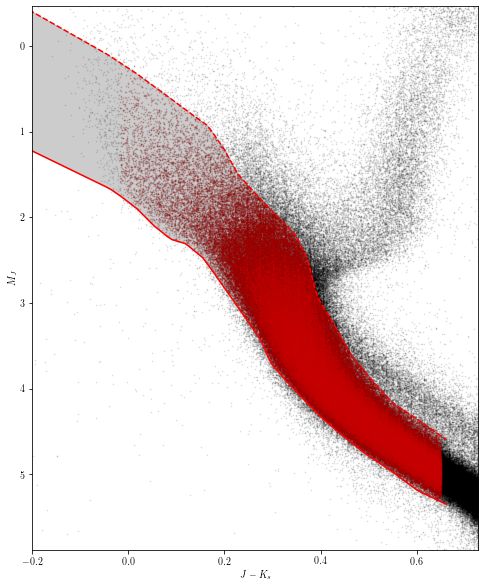

In [11]:
# HR diagram
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.5, length_check=False)
df_mask_65.viz.scatter("JK", "M_J", c='r', alpha=0.1, s=0.5, length_check=False)
plt.plot(jks, j_upper, 'r')
plt.plot(jks, j_lower, 'r--')
plt.fill_between(jks, j_upper, j_lower, alpha=0.2, color="k")
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(-0.2, jks[-1]*1.1)
plt.ylim(j_lower.min()*0.9, j_upper.max()*1.1)
plt.gca().invert_yaxis()
plt.show()

# Classify the stars based on `J-Ks` color

these ranges are non-linear

In [12]:
A0 = spectral_types[spectral_types["SpT"] == "A0V"]
F0 = spectral_types[spectral_types["SpT"] == "F0V"]
G0 = spectral_types[spectral_types["SpT"] == "G0V"]
G3 = spectral_types[spectral_types["SpT"] == "G3V"]
A0 = A0['J-K'].to_numpy()[0]
F0 = F0['J-K'].to_numpy()[0]
G0 = G0['J-K'].to_numpy()[0]
G3 = G3['J-K'].to_numpy()[0]
A0, F0, G0, G3

(-0.004, 0.14100000000000001, 0.329, 0.373)

In [20]:
df_w = df_mask_65.filter("abs(z) < 50").filter("JK > 0").filter("JK < 0.37").filter("w > -999")
df_w = df_w.extract()
df_w

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.007449204873851958,-0.0038001926468298535,7.51200008392334,7.169000148773193,AAA,2546012258943198592,116.3158950805664,20.228026959268842,0.05296581611037254,-114.54350652550279,0.01953381672501564,19.124114507523373,0.029094988480210304,8.495264053344727,8.804600715637207,8.01308822631836,2591.867919921875,3831.39404296875,0.8713244199752808,1.2016940116882324,-1.4493759063421943,-1.0569263427424165,52.14179992675781,52.06100082397461,52.21739959716797,0.0,0.0,9.999999747378752e-05,-0.20000000298023224,-0.28999999165534973,-0.10999999940395355,G,00014243-0013038,1,111,--,-7.301445960998535,gaia,0.20038652420043945,0.20038652420043945,1.0,5795.4130859375,gspphot,1.3994140625,1.7724609375,0.0,4.427599906921387,gspphot,0.0016999244689941406,0.0019001960754394531,0.0,nan,--,nan,nan,nan,-0.4796000123023987,gspphot,0.0037999749183654785,0.005199998617172241,0.0,0.20000000298023224,gspspec,0.01000000536441803,0.019999995827674866,0.0,nan,--,nan,nan,nan,0.3429999351501465,3.919906760986424,52.290002740079956,-45.536682935941016,25.703207849393966,-26.02050879934254,-113.36807788635274,0.04936702628561201,0.02738328665080204,0.20038652420043945,-28.098801069713016,-6.449303138211347,-0.0432842961885164,-0.015683996667161644,-7.45354129069441,0.1757986173630481,-28.058839193819132,0.1054662766523457,3.0032698349548297,0.020138573418315157,-28.633412967573285,0.10470702518474961,2.1725041631850557,3.9957347616238765
1,0.010886019970416593,0.14809881412055007,5.077000141143799,4.909999847412109,AAA,2746883550050748288,104.96347045898438,-93.86709820610827,0.07529714703559875,-46.97124474797831,0.059896424412727356,26.626807289488895,0.05965271592140198,5.635739326477051,5.781437397003174,5.3413615226745605,1286.078125,701.5516357421875,0.9138281345367432,1.186178207397461,-1.3472591136581011,-0.9156625705105482,37.73139953613281,37.65380096435547,37.8203010559082,0.0,0.0,9.999999747378752e-05,nan,nan,nan,F,00022969+0829075,1,111,--,10.91873836517334,gaia,0.13661456108093262,0.13661456108093262,1.0,7074.23486328125,gspphot,1.42138671875,1.4833984375,0.0,4.057000160217285,gspphot,0.0036001205444335938,0.00279998779296875,0.0,nan,--,nan,nan,nan,-0.7408999800682068,gspphot,0.023200035095214844,0.010899960994720459,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.16700029373168945,2.2035956166574495,37.55613615736636,-29.780755668887814,22.88165105189412,-103.79716075576094,-15.603825744104398,0.07396018137361994,0.06153969109697727,0.13661456108093262,-2.777731976009451,-18.477564231913245,-0.012599176705186203,-0.043439096225776214,-10.350568855849389,0.10860238843004742,4.449760305676502,0.08383196753192353,19.00425552701665,0.04625567004234596,0.2429374123330339,0.08231140170182588,0.9463220759909143,2.563654438942847
2,0.01351256596174286,0.5562382128464298,7.684999942779541,7.382999897003174,AAA,2873571753703279360,12.40060806274414,10.265181659269848,0.022076956927776337,-6.9570910337692,0.011609489098191261,13.10471597581109,0.02095140889286995,8.624852180480957,8.894630432128906,8.179407119750977,5522.19970703125,3433.3466796875,1.0916849374771118,1.200102686882019,-1.2025710408995658,-0.5216512633873294,76.02010345458984,75.89620208740234,76.1427001953125,0.00019999999494757503,0.0,

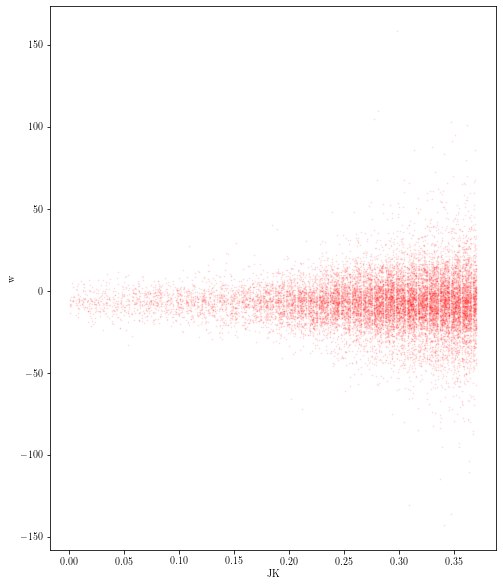

In [21]:
# HR diagram
plt.figure(figsize=(8,10))
df_w.viz.scatter("JK", "w", c='r', alpha=0.1, s=0.5, length_check=False)
plt.show()

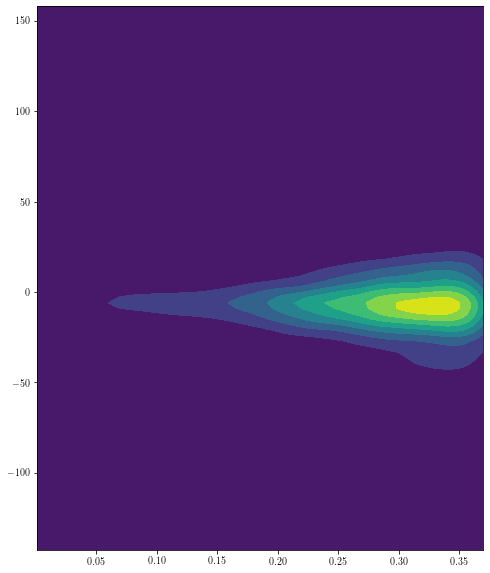

In [23]:
from scipy.stats import gaussian_kde

# gaussian kernel density estimation
jk = df_w["JK"].to_numpy()
w = df_w["w"].to_numpy()

f = gaussian_kde(np.vstack([jk, w]))

# evaluate on a regular grid
jk = np.linspace(jk.min(), jk.max(), 100)
w = np.linspace(w.min(), w.max(), 100)

jk, w = np.meshgrid(jk, w)

# evaluate on a regular grid
fs = f(np.vstack([jk.flatten(), w.flatten()]))

# plot
fs = fs.reshape(jk.shape)

plt.figure(figsize=(8,10))
plt.contourf(jk, w, fs)
plt.show()

In [24]:
w0 = df_w["w"].mean()
w0

array(-7.33735044)

In [33]:
mid = df_w.filter(f"w > {w0}-3").filter(f"w < {w0}+3")
mid = mid.extract()
mid

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.007449204873851958,-0.0038001926468298535,7.51200008392334,7.169000148773193,AAA,2546012258943198592,116.3158950805664,20.228026959268842,0.05296581611037254,-114.54350652550279,0.01953381672501564,19.124114507523373,0.029094988480210304,8.495264053344727,8.804600715637207,8.01308822631836,2591.867919921875,3831.39404296875,0.8713244199752808,1.2016940116882324,-1.4493759063421943,-1.0569263427424165,52.14179992675781,52.06100082397461,52.21739959716797,0.0,0.0,9.999999747378752e-05,-0.20000000298023224,-0.28999999165534973,-0.10999999940395355,G,00014243-0013038,1,111,--,-7.301445960998535,gaia,0.20038652420043945,0.20038652420043945,1.0,5795.4130859375,gspphot,1.3994140625,1.7724609375,0.0,4.427599906921387,gspphot,0.0016999244689941406,0.0019001960754394531,0.0,nan,--,nan,nan,nan,-0.4796000123023987,gspphot,0.0037999749183654785,0.005199998617172241,0.0,0.20000000298023224,gspspec,0.01000000536441803,0.019999995827674866,0.0,nan,--,nan,nan,nan,0.3429999351501465,3.919906760986424,52.290002740079956,-45.536682935941016,25.703207849393966,-26.02050879934254,-113.36807788635274,0.04936702628561201,0.02738328665080204,0.20038652420043945,-28.098801069713016,-6.449303138211347,-0.0432842961885164,-0.015683996667161644,-7.45354129069441,0.1757986173630481,-28.058839193819132,0.1054662766523457,3.0032698349548297,0.020138573418315157,-28.633412967573285,0.10470702518474961,2.1725041631850557,3.9957347616238765
1,0.0026148871919229443,0.6399905073571333,7.925000190734863,7.589000225067139,AAA,2880166693166343296,82.73067474365234,78.37703559167551,0.021187761798501015,-26.484048711283393,0.01303945854306221,15.151718169962095,0.019326141104102135,8.975677490234375,9.303422927856445,8.476606369018555,767.9575805664062,1025.9580078125,0.9314294457435608,1.2028168439865112,-1.1921329220783539,-0.4379284324665843,65.76010131835938,65.68090057373047,65.84400177001953,0.0006000000284984708,9.999999747378752e-05,0.00139999995008111,nan,nan,nan,G,00003595+3640075,1,111,--,-15.9609375,gaia,0.24688512086868286,0.24688512086868286,1.0,5651.42138671875,gspphot,1.64404296875,1.501953125,0.0,4.398200035095215,gspphot,0.001399993896484375,0.0012998580932617188,0.0,nan,--,nan,nan,nan,-0.2045000046491623,gspphot,0.006899997591972351,0.0034999996423721313,0.0,0.23999999463558197,gspspec,0.009999990463256836,0.01000000536441803,0.0,nan,--,nan,nan,nan,0.3359999656677246,3.8273096088616967,65.99911566349454,-27.987868672188167,59.77091663636821,70.79706505083645,-42.8035059833658,0.020877832442280222,0.01353014566212531,0.24688512086868286,-13.390469390024396,22.14785706654972,-0.01759631899953201,0.0289949657280047,-5.358374933402255,0.10590102513126358,-20.133157090659502,0.22371156926905886,-28.021696650547995,0.08697898435599848,-10.519320505724533,0.2081399301979129,2.1361002839571497,3.9544877670763072
2,0.013747400012598696,0.7875812910390129,8.123000144958496,7.86299991607666,AAA,386526445093789312,44.296417236328125,43.597039354577284,0.01233272161334753,-7.840331690270979,0.010880734771490097,7.959361534158386,0.017045583575963974,8.99416732788086,9.257359504699707,8.567570686340332,4836.01416015625,3936.63525390625,1.0071396827697754,1.1926255226135254,-1.150871348496402,-0.295191907116

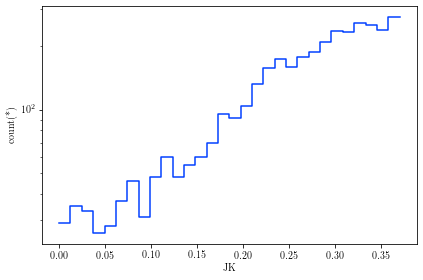

In [37]:
mid.viz.histogram("JK", limits=[0, 0.37], shape=30)
plt.yscale('log')

<BarContainer object of 30 artists>

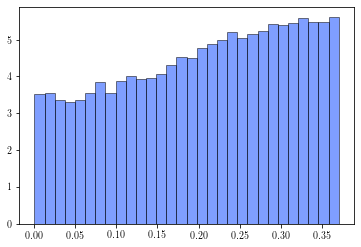

In [41]:
data = mid['JK'].to_numpy()
h, edge = np.histogram(data, bins=30)
jk = 0.5*(edge[:-1]+edge[1:])
djk = edge[1] - edge[0]

plt.bar(jk, np.log(h), width=djk, edgecolor='k', alpha=0.5)

<BarContainer object of 30 artists>

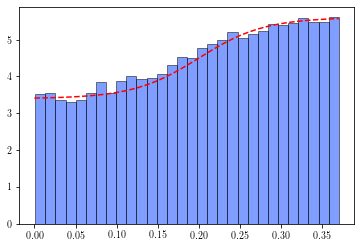

In [57]:
def sigmoid(x, a, b, c, d):
    return a / (1.0 + np.exp(-b * (x - c))) + d

x = np.linspace(0, 0.37, 100)
a = 2.2
b = 25
c = 0.2
d = 3.4

y = sigmoid(x, a, b, c, d)

plt.plot(x, y, 'r--')
plt.bar(jk, np.log(h), width=djk, edgecolor='k', alpha=0.5)

In [58]:
from scipy.optimize import curve_fit

p0 = [a, b, c, d]
popt, pcov = curve_fit(sigmoid, jk, np.log(h), p0=p0)
popt

array([ 2.29012576, 19.26214535,  0.18239531,  3.33664724])

<BarContainer object of 30 artists>

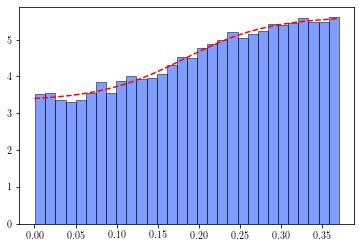

In [59]:
plt.plot(x, sigmoid(x, *popt), 'r--')
plt.bar(jk, np.log(h), width=djk, edgecolor='k', alpha=0.5)

In [88]:
jks = []
w0s = []
w_stds = []
for jk_low, jk_high in zip(edge[:-1:1], edge[1::1]):
    df_filter = df_w.filter(f"JK > {jk_low}").filter(f"JK < {jk_high}")
    df_filter = df_filter.extract()
    ws = df_filter["w"].to_numpy()
    w0 = ws.mean()
    w_std = ws.std()
    jks.append((jk_low+jk_high)/2)
    w0s.append(w0)
    w_stds.append(w_std)
    print(f"JK: {jk_low:.2f} - {jk_high:.2f}, w0: {w0:.2f}, w_std: {w_std:.2f}")
    # df_filter.viz.histogram("w", shape=20)
    # plt.show()


JK: 0.00 - 0.01, w0: -5.18, w_std: 4.72
JK: 0.01 - 0.03, w0: -7.41, w_std: 5.91


JK: 0.03 - 0.04, w0: -5.69, w_std: 6.25
JK: 0.04 - 0.05, w0: -7.69, w_std: 6.71
JK: 0.05 - 0.06, w0: -6.32, w_std: 7.40
JK: 0.06 - 0.07, w0: -6.21, w_std: 6.31
JK: 0.07 - 0.09, w0: -5.51, w_std: 6.03
JK: 0.09 - 0.10, w0: -6.90, w_std: 6.07
JK: 0.10 - 0.11, w0: -6.59, w_std: 7.08
JK: 0.11 - 0.12, w0: -6.47, w_std: 6.90
JK: 0.12 - 0.14, w0: -6.85, w_std: 8.00
JK: 0.14 - 0.15, w0: -7.19, w_std: 9.05
JK: 0.15 - 0.16, w0: -7.28, w_std: 7.76
JK: 0.16 - 0.17, w0: -6.42, w_std: 8.02
JK: 0.17 - 0.19, w0: -6.79, w_std: 8.30
JK: 0.19 - 0.20, w0: -7.04, w_std: 9.45
JK: 0.20 - 0.21, w0: -6.98, w_std: 9.86
JK: 0.21 - 0.22, w0: -8.33, w_std: 9.79
JK: 0.22 - 0.23, w0: -7.27, w_std: 10.65
JK: 0.23 - 0.25, w0: -6.99, w_std: 11.28
JK: 0.25 - 0.26, w0: -7.19, w_std: 12.89
JK: 0.26 - 0.27, w0: -6.91, w_std: 13.54
JK: 0.27 - 0.28, w0: -7.55, w_std: 14.82
JK: 0.28 - 0.30, w0: -6.79, w_std: 14.33
JK: 0.30 - 0.31, w0: -7.23, w_std: 16.42
JK: 0.31 - 0.32, w0: -7.87, w_std: 17.15
JK: 0.32 - 0.33, w0: -7.03, w_st

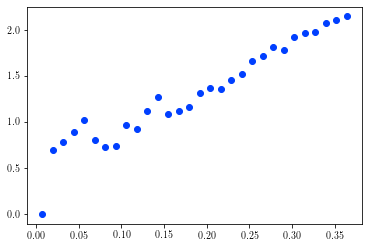

In [89]:
plt.scatter(jks, np.arccosh(w_stds/np.min(w_stds)))
# plt.yscale('log')

In [14]:
p = 2.1
jk_s_stretch = np.linspace(0, (G3-A0)**p, 13)
jk_s = np.power(jk_s_stretch, 1/p)+A0
jk_bound = [np.round(jk,2) for jk in zip(jk_s[:-1], jk_s[1:])]
jk_bound, 0.5*(jk_s[:-1]+jk_s[1:])

([array([-0.  ,  0.11]),
  array([0.11, 0.16]),
  array([0.16, 0.19]),
  array([0.19, 0.22]),
  array([0.22, 0.24]),
  array([0.24, 0.27]),
  array([0.27, 0.29]),
  array([0.29, 0.31]),
  array([0.31, 0.32]),
  array([0.32, 0.34]),
  array([0.34, 0.36]),
  array([0.36, 0.37])],
 array([0.05373186, 0.13404066, 0.17372162, 0.20512763, 0.23195394,
        0.25574675, 0.27733638, 0.29723139, 0.31577042, 0.33319257,
        0.34967406, 0.36534929]))

In [15]:
zb = 400.0
zb

400.0

In [16]:
data_dir

'/home2/s20321005/Thesis-Project/Data/Color/no'

gaia_(-0.00)_(0.11).hdf5 2348


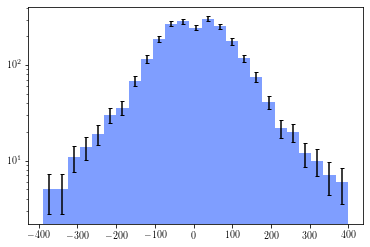

2348


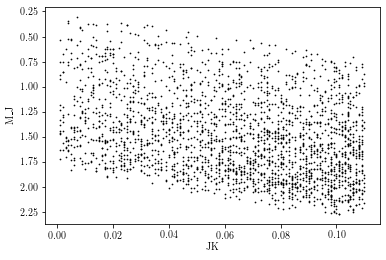

export(hdf5) [########################################] 100.00% elapsed time  :     1.82s =  0.0m =  0.0h 
 gaia_(0.11)_(0.16).hdf5 2045


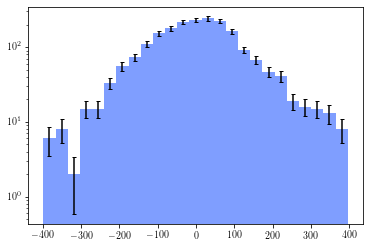

2045


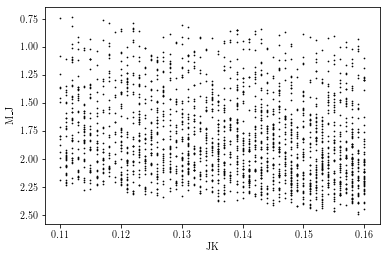

export(hdf5) [########################################] 100.00% elapsed time  :     1.88s =  0.0m =  0.0h   
 gaia_(0.16)_(0.19).hdf5 2007


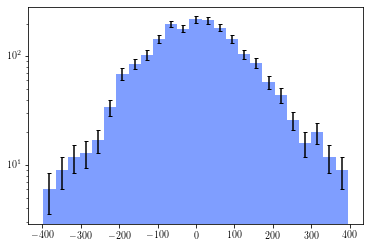

2007


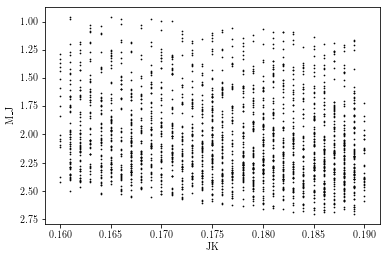

export(hdf5) [########################################] 100.00% elapsed time  :     1.87s =  0.0m =  0.0h
 gaia_(0.19)_(0.22).hdf5 3649


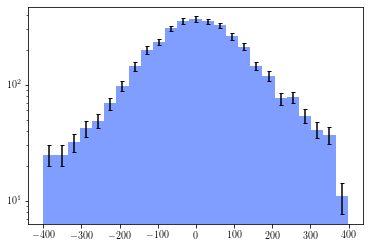

3649


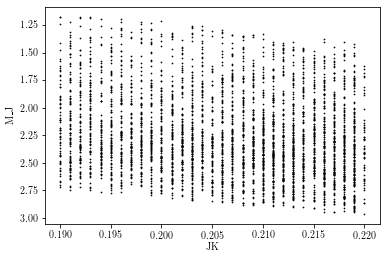

export(hdf5) [########################################] 100.00% elapsed time  :     1.91s =  0.0m =  0.0h 
 gaia_(0.22)_(0.24).hdf5 3658


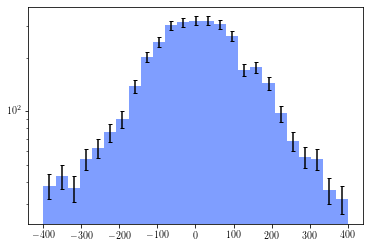

3658


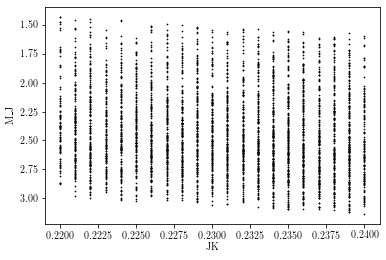

export(hdf5) [########################################] 100.00% elapsed time  :     1.93s =  0.0m =  0.0h 
 gaia_(0.24)_(0.27).hdf5 7991


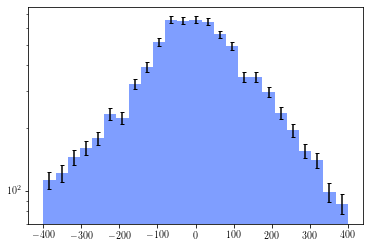

7991


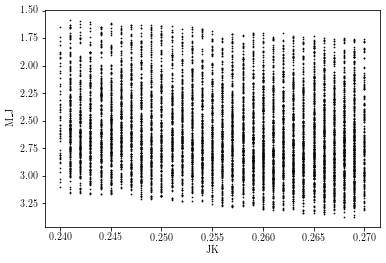

export(hdf5) [########################################] 100.00% elapsed time  :     1.96s =  0.0m =  0.0h 
 gaia_(0.27)_(0.29).hdf5 7828


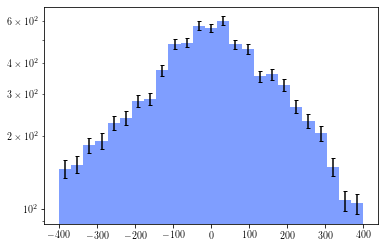

7828


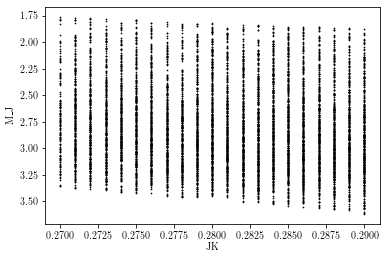

export(hdf5) [########################################] 100.00% elapsed time  :     2.04s =  0.0m =  0.0h    
 gaia_(0.29)_(0.31).hdf5 9731


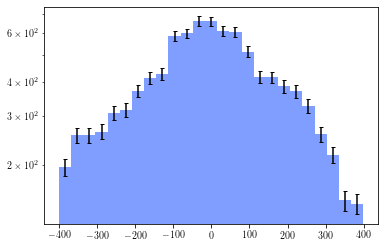

9731


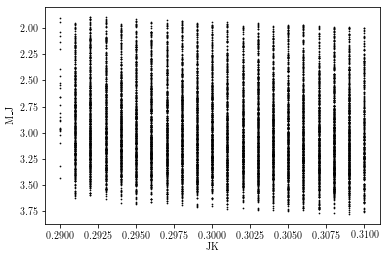

export(hdf5) [########################################] 100.00% elapsed time  :     2.04s =  0.0m =  0.0h 
 gaia_(0.31)_(0.32).hdf5 5724


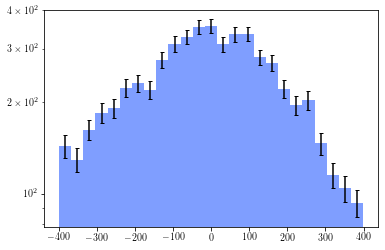

5724


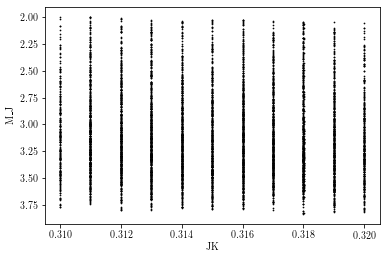

export(hdf5) [########################################] 100.00% elapsed time  :     2.05s =  0.0m =  0.0h 
 gaia_(0.32)_(0.34).hdf5 12290


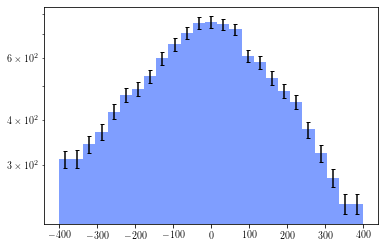

12290


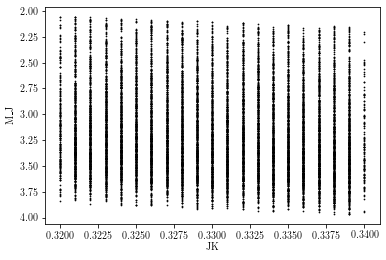

export(hdf5) [########################################] 100.00% elapsed time  :     2.04s =  0.0m =  0.0h 
 gaia_(0.34)_(0.36).hdf5 14424


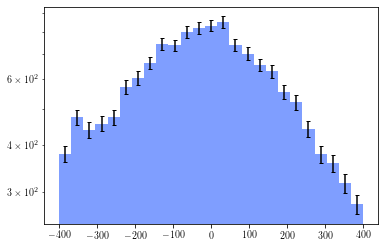

14424


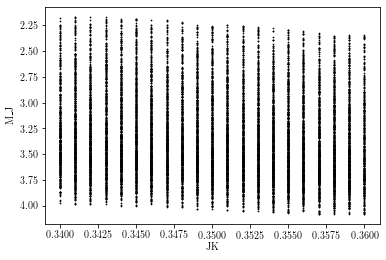

export(hdf5) [########################################] 100.00% elapsed time  :     2.17s =  0.0m =  0.0h 
 gaia_(0.36)_(0.37).hdf5 7613


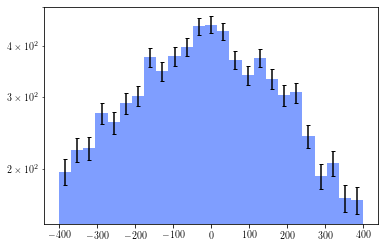

7613


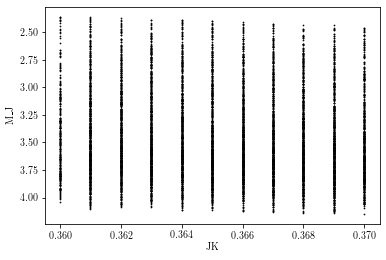

export(hdf5) [########################################] 100.00% elapsed time  :     2.00s =  0.0m =  0.0h   
 

In [17]:
for jk_b in jk_bound:
    jk_low, jk_high = jk_b[0], jk_b[1]
    df_color = df.filter(f"JK < {jk_high}").filter(f"JK > {jk_low}").filter(f"abs(z) < {zb}")
    df_color = df_color.extract()
    df_color["M_J_lower"] = j_lower_interp(df_color["JK"].to_numpy())
    df_color["M_J_upper"] = j_upper_interp(df_color["JK"].to_numpy())
    df_color["M_J_lower"] = df_color["M_J_lower"].astype("float64")
    df_color["M_J_upper"] = df_color["M_J_upper"].astype("float64")
    df_color = df_color.filter("M_J < M_J_upper").filter("M_J > M_J_lower")
    df_color = df_color.extract()
    name = f"gaia_({jk_low:.2f})_({jk_high:.2f}).hdf5"
    print(name, len(df_color))
    zs = df_color["z"].to_numpy()
    znum, zedge = np.histogram(zs, bins=25)
    zmid = (zedge[1:]+zedge[:-1])/2
    zerr = np.sqrt(znum)
    dz = np.diff(zedge)[0]
    plt.bar(zmid, znum, yerr=zerr, width=dz, alpha=0.5, capsize=2)
    plt.yscale("log")
    plt.show()
    print(len(zs))
    df_color.viz.scatter("JK", "M_J", c='k', alpha=1, s=0.5, length_check=False)
    plt.gca().invert_yaxis()
    plt.show()
    df_color.export(join(data_dir, name), progress=True)